In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler,LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [19]:
data = pd.read_csv('house_features.csv')

data = data[data.apply(lambda row: len(row) == 8, axis=1)]

data = data[data['Address'].notnull()]

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

data = data[data['Area'] < 1000]

data.to_csv('cleaned_dataset.csv', index=False)

cleaned_data_set = pd.read_csv('cleaned_dataset.csv')
cleaned_data_set.describe()

,Area,Room,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05
std,69.550976,0.760216,8.125918e+09,2.708639e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [20]:
df = pd.read_csv('cleaned_dataset.csv')
df.describe

<bound method NDFrame.describe of        Area  Room  Parking  Warehouse  Elevator             Address   
0      63.0     1     True       True      True             Shahran  \
1      60.0     1     True       True      True             Shahran   
2      79.0     2     True       True      True              Pardis   
3      95.0     2     True       True      True       Shahrake Qods   
4     123.0     2     True       True      True      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3445   86.0     2     True       True      True  Southern Janatabad   
3446   83.0     2     True       True      True            Niavaran   
3447   75.0     2    False      False     False              Parand   
3448  105.0     2     True       True      True              Dorous   
3449   82.0     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000

In [21]:
enc = OrdinalEncoder()
numeric_address = enc.fit_transform(df[['Address']])
df['numeric_address'] = numeric_address
df.to_csv('cleaned_dataset_2.csv', index=False)


In [22]:
msk = np.random.rand(len(df))  < 0.8
train = df[msk]
test = df[~msk]

In [24]:
le = LabelEncoder()

train = train.apply(lambda x: x.fillna(x.mode()[0]))
test = test.apply(lambda x:x.fillna(x.mode()[0]))

non_numeric_columns = train.select_dtypes(exclude=['number', 'string']).columns

for column in non_numeric_columns:
     train[column] = le.fit_transform(train[column])
     test[column] =  le.transform(test[column]) 

In [25]:

train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']])
train_y = np.asanyarray(train[['Price(USD)']])

test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']])
test_y = np.asanyarray(test[['Price(USD)']])

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
train_y = scaler.fit_transform(train_y)

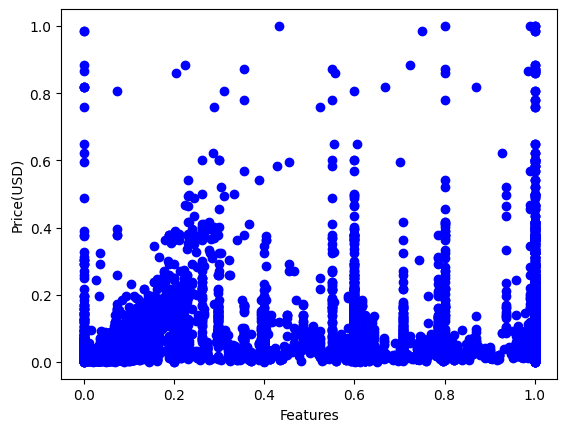

In [26]:
plt.plot(train_x, train_y, 'bo')
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()
df.to_csv('cleaned_dataset_2.csv', index=False)

In [27]:
model=GradientBoostingRegressor(loss='squared_error',n_estimators=500,max_depth=128,min_samples_split=2,min_samples_leaf=2)

In [28]:

model.fit(train_x,train_y)

predict_trainYn = model.predict(train_x)
predict_testYn=model.predict(test_x)

r_train=r2_score(train_y,predict_trainYn)
r_test=r2_score(test_y,predict_testYn)
print(r_train)
print(r_test) 

c:\Users\98935\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.9910046236785488
-0.4267611290998736


TypeError: float() argument must be a string or a real number, not 'DecisionTreeRegressor'

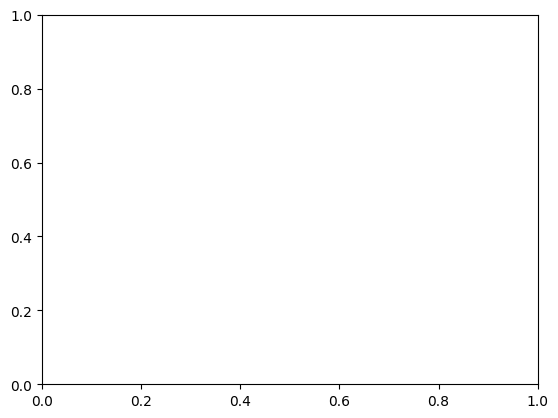

In [29]:
plt.plot(model)
plt.show()